In [2]:
import pandas as pd 
import pandas as np
import os
os.chdir('/home/yupaporn/codes/USAI')
data_train = pd.read_csv("sub_result1_250.csv") 


In [3]:
#เช็คคลาสใน Predicted
pred_class = set(data_train['3Predicted'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['2Actual'])
print('Actual : ',len(classe))
print(classe)

Predicted :  13
{'P52', 'P32', 'P1', 'P8', 'P41', 'P61', 'P51', 'P62', 'P31', 'P71', 'P72', 'P42', 'P2'}
Actual :  13
{'P52', 'P32', 'P1', 'P8', 'P41', 'P61', 'P51', 'P62', 'P31', 'P71', 'P72', 'P42', 'P2'}


In [4]:
data_train

,Unnamed: 0,2Actual,3Predicted,4Class_prob,5moreprop,6morepred,path
0,0,P1,P1,0.404419,"[0.4044187, 0.29109746, 0.12150033]","['P1', 'P41', 'P61']",/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
1,1,P1,P31,0.211730,"[0.2117303, 0.20585819, 0.1630897]","['P31', 'P1', 'P32']",/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
2,2,P1,P61,0.339070,"[0.33907032, 0.321388, 0.22381191]","['P61', 'P41', 'P1']",/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
3,3,P1,P1,0.328801,"[0.32880053, 0.12465016, 0.1120772]","['P1', 'P32', 'P71']",/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
4,4,P1,P1,0.260497,"[0.26049727, 0.23410313, 0.16783781]","['P1', 'P72', 'P41']",/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
...,...,...,...,...,...,...,...
120,120,P8,P8,0.645624,"[0.6456242, 0.32115686, 0.012337658]","['P8', 'P32', 'P41']",/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
121,121,P8,P8,0.805175,"[0.80517477, 0.17786601, 0.005074896]","['P8', 'P32', 'P41']",/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
122,122,P8,P8,0.922264,"[0.9222641, 0.076861314, 0.00052321516]","['P8', 'P32', 'P72']",/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
123,123,P8,P8,0.912131,"[0.9121313, 0.08275603, 0.001752438]","['P8', 'P32', 'P72']",/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...


# Confusion matrix

In [5]:
act = data_train['2Actual'].array
pred = data_train['3Predicted'].array

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [7]:
classes =['P1','P2','P31','P32','P41','P42','P51','P52','P61','P62','P71','P72','P8']

In [11]:
cmat = confusion_matrix(act, pred, classes)
# print('fan classifier accuracy = {}%'.format((100.*numpy.trace(cmat))/(numpy.sum(cmat))))
print('fan classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

fan classifier accuracy = 65.6%


In [13]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
print(classification_report(act, pred))#performance

              precision    recall  f1-score   support

          P1       0.80      0.80      0.80        10
          P2       0.64      0.70      0.67        10
         P31       0.67      0.60      0.63        10
         P32       0.60      0.60      0.60        10
         P41       0.67      0.55      0.60        11
         P42       0.43      0.60      0.50        10
         P51       0.73      0.80      0.76        10
         P52       0.88      0.70      0.78        10
         P61       0.33      0.20      0.25        10
         P62       1.00      0.25      0.40         4
         P71       0.83      1.00      0.91        10
         P72       0.67      0.60      0.63        10
          P8       0.60      0.90      0.72        10

    accuracy                           0.66       125
   macro avg       0.68      0.64      0.63       125
weighted avg       0.66      0.66      0.65       125



In [14]:
data = {'Predicted' : pred, 'Actual': act}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Predicted'],df['Actual'],rownames=['Predicted'],colnames=['Actual'])
conf_mat
# conf_mat.to_csv('confusionmat.csv')

Actual,P1,P2,P31,P32,P41,P42,P51,P52,P61,P62,P71,P72,P8
Predicted,,,,,,,,,,,,,
P1,8,1,1,0,0,0,0,0,0,0,0,0,0
P2,0,7,1,0,0,0,1,1,1,0,0,0,0
P31,1,0,6,0,0,1,0,0,1,0,0,0,0
P32,0,0,0,6,0,0,0,0,2,0,0,1,1
P41,0,0,0,0,6,3,0,0,0,0,0,0,0
P42,0,0,1,0,4,6,1,0,1,1,0,0,0
P51,0,0,0,0,1,0,8,0,2,0,0,0,0
P52,0,0,0,0,0,0,0,7,0,0,0,1,0
P61,1,1,0,0,0,0,0,0,2,2,0,0,0


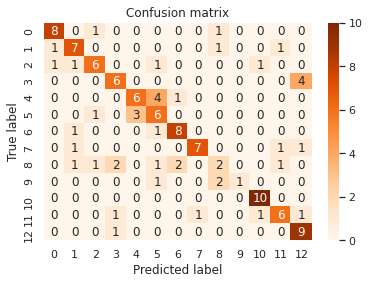

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(act, pred)

import seaborn as sns
sns.set()
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges") #Blues,Oranges,Reds
ax.set_title('Confusion matrix')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')


os.chdir( '/home/yupaporn/EfficientNet_USAI/')
plt.savefig('ConfusionMatrix.png')

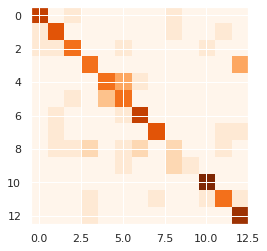

In [31]:
cm = confusion_matrix(act, pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)

In [28]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=45)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks() +1).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 8  0  1  0  0  0  0  0  1  0  0  0  0]
 [ 1  7  0  0  0  0  0  0  1  0  0  1  0]
 [ 1  1  6  0  0  1  0  0  0  0  1  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  4]
 [ 0  0  0  0  6  4  1  0  0  0  0  0  0]
 [ 0  0  1  0  3  6  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  8  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  7  0  0  0  1  1]
 [ 0  1  1  2  0  1  2  0  2  0  0  1  0]
 [ 0  0  0  0  0  1  0  0  2  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  1  0  0  0  1  0  0  1  6  1]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  9]]


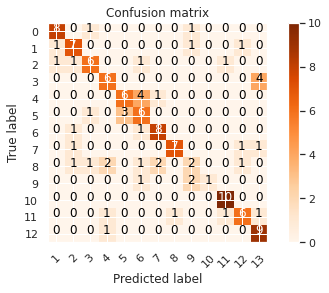

In [29]:
cm = confusion_matrix(act, pred)
# np.set_printoptions(precision=1) 
print('Confusion matrix, without normalization')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()

# ROC Curve

In [ ]:
def confusion_matrix_all(data_train,classes,threshold,sub=True):


    #1. manage data  --------------------------------------------------------------------------------------------------------------------------------------------------

    if sub ==True:

        p1 = data_train #Input table
   
        if classes =='P1':
            act= p1['2Actual'].map({'P1':1,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':1,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P2':
            act= p1['2Actual'].map({'P1':0,'P2':1,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':1,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P31':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P31':1,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':1,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P32':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':1,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':1,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P41':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':1,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':1,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P42':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':1,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':1,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P51':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':1,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':1,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P52':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':1,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':1,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P61':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':1,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':1,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P62':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':1,'P71':0,'P72':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':1,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P71':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':1,'P72':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':1,'P72':0,'P8':0}).values
        elif classes =='P72':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':1,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':1,'P8':0}).values
        elif classes =='P8':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':1}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':1}).values
#             act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#             pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values

        prob_all = p1['4Class_prob'].to_numpy()

    else :
        p1 = data_train #Input table

        if classes =='P1':
            act= p1['2Actual'].map({'P1':1,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':1,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
        elif classes =='P2':
            act= p1['2Actual'].map({'P1':0,'P2':1,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':1,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0})
            pred = pred.values
        elif classes =='P3':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P3':1,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P3':1,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
        elif classes =='P4':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P3':0,'P4':1,'P5':0,'P6':0,'P7':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P3':0,'P4':1,'P5':0,'P6':0,'P7':0,'P8':0}).values
        elif classes =='P5':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':1,'P6':0,'P7':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':1,'P6':0,'P7':0,'P8':0}).values
        elif classes =='P6':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':1,'P7':0,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':1,'P7':0,'P8':0}).values
        elif classes =='P7':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':1,'P8':0}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':1,'P8':0}).values
        elif classes =='P8':
            act= p1['2Actual'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':1}).values
            pred = p1['3Predicted'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':1}).values

        prob_all = p1['4Class_prob'].to_numpy()
        
    #2. เงื่อนไข ---------------------------------------------------------------------------------------------------------------------------------------------

    TP,TN,FP,FN,posi_tp,posi_tn,posi_fp,posi_fn = list(), list(), list(), list(),list(), list(), list(), list()
    for i in range(len(act)):
        if act[i] & pred[i]  == 1:
            tp = 1
            po_tp = i
            TP.append(tp)
            posi_tp.append(po_tp)
        elif act[i] == 0: 
            if pred[i]  == 1:
                fp = 1
                po_fp = i
                FP.append(fp)
                posi_fp.append(po_fp)  

        if act[i] == 1: 
            if pred[i]  == 0:
                fn = 1
                po_fn = i
                FN.append(fn)
                posi_fn.append(po_fn) 
        elif act[i] | pred[i]  == 0:
            tn = 1
            po_tn = i
            TN.append(tn)
            posi_tn.append(po_tn)



    print('(',len(TN),',', len(FP),',', len(FN),',', len(TP) ,')')

# 3. threshold ----------------------------------------------------------------

    if  posi_tp or posi_fp  != 0:      
                #Keep only interested TP, FP 
        inter_point = posi_tp+posi_fp
        inter = act[inter_point]
        prob = prob_all[inter_point]

        import numpy as np
        from sklearn.metrics import confusion_matrix

#         threshold = 0
        t = prob >= threshold
        t = np.where(t=='True', 1, t) #repalce True-1,False-0

        tp_new,tn_new,fp_new,fn_new = list(),list(),list(),list()
        for i in range(len(inter)):
            if inter[i] & t[i]  == 1:
                tp0 = 1
                tp_new.append(tp0)

            elif inter[i] == 0: 
                if t[i]  == 1:
                    fp0 = 1
                    fp_new.append(fp0) 

            if inter[i] == 1: 
                if t[i]  == 0:
                    fn0 = 1
                    fn_new.append(fn0)

            elif inter[i] | t[i]  == 0:
                tn0 = 1
                tn_new.append(tn0)  #find  confusion matrix

        if TN.count(1) !=0:
            tn_new = TN.count(1)+tn_new.count(1)
        else : 
            tn_new = tn_new.count(1)    
        if FN.count(1) !=0:
            fn_new = FN.count(1)+fn_new.count(1)
        else :
            fn_new = fn_new.count(1)

        fp_new = fp_new.count(1)
        tp_new = tp_new.count(1)

        print('(TN,FP,FN,TP)')
        print('(',tn_new,',', fp_new,',', fn_new,',', tp_new ,')')

        return tn_new, fp_new, fn_new, tp_new

    else :
        print('(TN,FP,FN,TP)')
        print('(',TN.count(1),',', FP.count(1),',', FN.count(1),',', TP.count(1) ,')')

        return TN.count(1),  FP.count(1), FN.count(1), TP.count(1) 

In [52]:
import numpy as np
# classes =['P1','P2','P3','P4','P5','P6','P7','P8']
# classes =['P2']
classes =['P1','P2','P31','P32','P41','P42','P51','P52','P61','P62','P71','P72','P8']
threshold = np.arange(0.0, 1.002, 0.001)

TN, FP, FN, TP = list(),list(),list(),list()
precision, recall, ACC, TPR, FPR, SPEC = list(),list(),list(),list(),list(),list()

for i in threshold:
    TN0, FP0, FN0, TP0 = list(),list(),list(),list()
    precision0, recall0, ACC0, TPR0, FPR0, SPEC0 = list(),list(),list(),list(),list(),list()
    
    for j in classes:
        tn,fp,fn,tp = confusion_matrix_all(data_train,j,i,sub=True) 
        try:
            pre = tp/(tp+fp)
            re= tp/(tp+fn)
            acc = (tp+tn)/(tp+tn+fp+fn)
            tpr = tp/(tp+fn)
            fpr = fp/(fp+tn)
            spec = 1-(tn/(tn+fp))
        except ZeroDivisionError:
            pre,re,acc,tpr,fpr,spec =1,0,0,0,0,0      
            
        TP0.append(tp)
        TN0.append(tn)
        FP0.append(fp)
        FN0.append(fn)
        precision0.append(pre)
        recall0.append(re)
        ACC0.append(acc)
        TPR0.append(re)
        FPR0.append(fpr)       
        SPEC0.append(spec)
        
    precision.append(precision0)
    recall.append(recall0)
    ACC.append(ACC0)
    TPR.append(TPR0)
    FPR.append(FPR0)       
    SPEC.append(SPEC0)

( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP

/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:130: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,

( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP

( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP

( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,

( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP

( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,

( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP

( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,

( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,

( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111

( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,

( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP

( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP

( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,

( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,

( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,

( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP

( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP

( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP

( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 2 , 8 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP

( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,

( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,

( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 3 , 7 )
(TN,

( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP

( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 111 , 4 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 109 , 6 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP

( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 112 , 3 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 5 , 5 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP

( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,

( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 3 , 1 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 113 , 2 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP

( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,

( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 112 , 3 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP

( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP

( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 114 , 1 , 7 , 3 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 107 , 8 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 114 , 1 , 3 , 7 )
(TN,FP

( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 108 , 7 , 4 , 6 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 11

( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 4 , 6 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 0 , 10 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP

( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 5 , 5 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 1 , 9 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 5 , 5 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,

( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 1 , 9 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 6 , 4 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 111 , 3 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 1 , 9 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP

( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 6 , 4 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 1 , 9 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 6 , 4 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,

( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 6 , 4 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 1 , 9 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 110 , 5 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 6 , 4 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,

( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 1 , 9 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 111 , 4 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 6 , 4 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,

( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 2 , 8 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 111 , 4 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 5 , 5 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 5 , 6 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,

( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 2 , 8 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 111 , 4 , 1 , 9 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 6 , 5 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 2 , 8 )
( 112 , 3 , 4 , 6 )
(TN,FP

( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 6 , 5 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 2 , 8 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 111 , 4 , 2 , 8 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 6 , 5 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,

( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 6 , 5 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 5 , 5 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 2 , 8 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 111 , 4 , 2 , 8 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 6 , 5 )
( 107 , 8 , 4 , 6 )
(TN,FP,

( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 2 , 8 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 7 , 3 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 6 , 4 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 6 , 5 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 2 , 8 )
( 112 , 3 , 4 , 6 )
(TN,FP

( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 7 , 3 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 112 , 2 , 6 , 5 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 2 , 8 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 7 , 3 )
( 111 , 3 , 5 , 6 )
(TN,FP,

( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 7 , 3 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 7 , 4 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 109 , 6 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 2 , 8 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 111 , 4 , 4 , 6 )
(TN,FP,

( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 7 , 3 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 7 , 4 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 110 , 5 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 2 , 8 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 7 , 3 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 7 , 4 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 110 , 5 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,

( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 7 , 4 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 110 , 5 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 7 , 3 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 7 , 4 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 110 , 5 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,

( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 7 , 3 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 7 , 4 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP

( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 7 , 3 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 7 , 4 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 111 , 4 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 2 , 8 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,

( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 7 , 3 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 7 , 4 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 7 , 3 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 113 , 2 , 7 , 3 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 7 , 4 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,

( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 7 , 3 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 7 , 4 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP

( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 7 , 3 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 7 , 4 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 3 , 7 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 112 , 3 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,

( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 8 , 3 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 6 , 4 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP

( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 8 , 3 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 7 , 3 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 8 , 3 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 7 , 3 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,

( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 8 , 3 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 7 , 3 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP

( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 8 , 3 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 7 , 3 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,

( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 7 , 3 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 113 , 2 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 8 , 3 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 7 , 3 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP

( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 8 , 3 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 7 , 3 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP

( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 8 , 3 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 7 , 3 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP

( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 7 , 3 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 8 , 3 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 7 , 3 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,

( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 8 , 3 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 8 , 2 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 3 , 7 )
( 113 , 2 , 2 , 8 )
(TN,F

( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 9 , 2 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 8 , 2 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 4 , 6 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111

( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 9 , 2 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 8 , 2 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 4 , 6 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 9 , 2 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 8 , 2 )
( 112 , 3 , 2 , 8 )
(TN,

( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 9 , 2 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 112 , 3 , 8 , 2 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 5 , 5 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN

( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 9 , 2 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 5 , 5 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(

( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 7 , 3 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 9 , 2 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 7 , 3 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 4 , 6 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 109 , 6 , 1 , 9 )
(

( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 9 , 2 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 7 , 3 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 5 , 5 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 7 , 3 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 9 , 2 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 7 , 3 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(

( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 5 , 5 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 114 , 1 , 7 , 3 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 10 , 1 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 5 , 5 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 5 , 5 )
( 113 , 2 , 2 , 8 )

( 115 , 0 , 6 , 4 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 10 , 1 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2

( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 6 , 4 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 10 , 1 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 113 , 2 , 8 , 2 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 109 , 6 , 1 , 9

( 114 , 1 , 9 , 1 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 8 , 2 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 10 , 1 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0

( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 11 , 0 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 11 , 0 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 ,

( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 11 , 0 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 6 , 4 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 ,

( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 10 , 0 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 11 , 0 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 114 , 1 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 7 , 3 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 114 , 1 , 10 , 0 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5

( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 11 , 0 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 7 , 3 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 11 , 0 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 121 , 0 , 3

( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 8 , 2 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 109 , 6 , 1 , 9 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 113 , 2 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 3 , 5 , 6 )
(TN,FP,FN,TP)
( 114 , 0 , 11 , 0 )
( 107 , 8 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 112 , 3 , 2 , 8 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 114 , 1 , 3 , 7 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 111 , 4 , 8 , 2 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 121 , 0 , 3 , 1 )
(TN,FP,FN,TP)
( 121 , 0 , 4 , 0 )
( 113 , 2 , 0 , 10 )
(TN,FP,FN,TP)
( 115 , 0 , 9 , 1 )
( 112 , 3 , 4 , 6 )
(TN,FP,FN,TP)
( 115 , 0 , 10 , 0 )
( 109 , 6 , 1 

In [53]:
#average per threshold 
precision1,recall1,ACC1,TPR1,FPR1,SPEC1 = list(),list(),list(),list(),list(),list()
from statistics import *
for m in range(0,len(precision)):
    a1 =mean(precision[m])
    a2 =mean(recall[m])
    a3 =mean(ACC[m])
    a4 =mean(TPR[m])
    a5 =mean(FPR[m])
    a6 =mean(SPEC[m])
    
    precision1.append(a1)
    recall1.append(a2)
    ACC1.append(a3)
    TPR1.append(a4)
    FPR1.append(a5)       
    SPEC1.append(a6)   

In [54]:
#create dataframe
import numpy as np
i = np.arange(len(precision1)) # index for df
roc0 = pd.DataFrame({'Threshold' : pd.Series(threshold, index=i),'Precision' : pd.Series(precision1, index = i),'Recall' : pd.Series(recall1, index = i),'tpr' : pd.Series(TPR1, index = i),'fpr' : pd.Series(FPR1, index = i),'1-Spec' : pd.Series(SPEC1, index = i),  'ACC' : pd.Series(ACC1, index = i)})
roc0 = roc0.fillna(1)

fix_value = [{'Threshold':0.000,'Precision':0.000,'Recall':1.000,'tpr':1.000,'fpr':1.000,'1-Spec':1.000,'ACC':0.000}]
roc0 = roc0.append(fix_value,ignore_index=True,sort=False)
roc0 = roc0.apply(np.roll, shift=1) #move he last row to the first

In [55]:
roc0

,Threshold,Precision,Recall,tpr,fpr,1-Spec,ACC
0,0.000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000,0.679529,0.638112,0.638112,0.028780,0.028780,0.947077
2,0.001,0.679529,0.638112,0.638112,0.028780,0.028780,0.947077
3,0.002,0.679529,0.638112,0.638112,0.028780,0.028780,0.947077
4,0.003,0.679529,0.638112,0.638112,0.028780,0.028780,0.947077
5,0.004,0.679529,0.638112,0.638112,0.028780,0.028780,0.947077
6,0.005,0.679529,0.638112,0.638112,0.028780,0.028780,0.947077
7,0.006,0.679529,0.638112,0.638112,0.028780,0.028780,0.947077
8,0.007,0.679529,0.638112,0.638112,0.028780,0.028780,0.947077
9,0.008,0.679529,0.638112,0.638112,0.028780,0.028780,0.947077


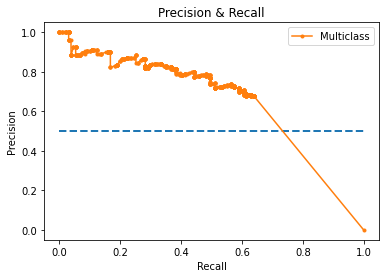

PR AUC (area = 0.65)


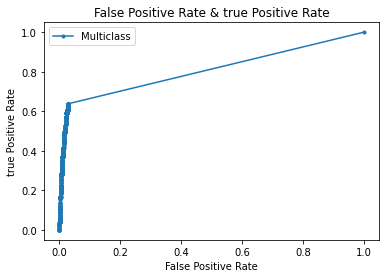

PR ROC (area = 0.81)


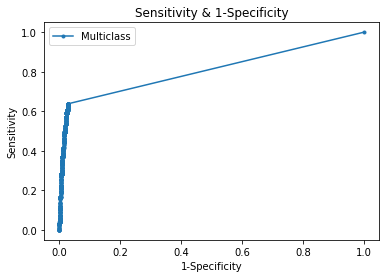

PR AUC (area = 0.81)


In [58]:
plot_roc(roc0)

In [ ]:
# sub = True
# classes ='P8'

# if sub ==True:

#     p1 = data_train #Input table
   
#     if classes =='P1':
#         act= p1['2Actual'].map({'P1':1,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':1,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#     elif classes =='P2':
#         act= p1['2Actual'].map({'P1':0,'P2':1,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':1,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#     elif classes =='P31':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P31':1,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':1,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#     elif classes =='P32':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':1,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':1,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#     elif classes =='P41':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':1,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':1,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#     elif classes =='P42':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':1,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':1,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#     elif classes =='P51':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':1,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':1,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#     elif classes =='P52':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':1,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':1,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#     elif classes =='P61':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':1,'P62':0,'P71':0,'P72':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':1,'P62':0,'P71':0,'P72':0,'P8':0}).values
#     elif classes =='P62':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':1,'P71':0,'P72':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':1,'P71':0,'P72':0,'P8':0}).values
#     elif classes =='P71':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':1,'P72':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':1,'P72':0,'P8':0}).values
#     elif classes =='P72':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':1,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':1,'P8':0}).values
#     elif classes =='P8':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':1}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':1}).values
# #             act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
# #             pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values

#     prob_all = p1['4Class_prob'].to_numpy()

# else :
#     p1 = data_train #Input table

#     if classes =='P1':
#         act= p1['2Actual'].map({'P1':1,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':1,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
#     elif classes =='P2':
#         act= p1['2Actual'].map({'P1':0,'P2':1,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':1,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0})
#         pred = pred.values
#     elif classes =='P3':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P3':1,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P3':1,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
#     elif classes =='P4':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P3':0,'P4':1,'P5':0,'P6':0,'P7':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P3':0,'P4':1,'P5':0,'P6':0,'P7':0,'P8':0}).values
#     elif classes =='P5':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':1,'P6':0,'P7':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':1,'P6':0,'P7':0,'P8':0}).values
#     elif classes =='P6':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':1,'P7':0,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':1,'P7':0,'P8':0}).values
#     elif classes =='P7':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':1,'P8':0}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':1,'P8':0}).values
#     elif classes =='P8':
#         act= p1['2Actual'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':1}).values
#         pred = p1['3Predicted'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':1}).values

#     prob_all = p1['4Class_prob'].to_numpy()

# Function

In [49]:
def average_threshold(precision,recall,ACC,TPR,FPR,SPEC):
    #average per threshold 
    precision1,recall1,ACC1,TPR1,FPR1,SPEC1 = list(),list(),list(),list(),list(),list()
    from statistics import mean
    for m in range(0,len(precision)):
        a1 =mean(precision[m])
        a2 =mean(recall[m])
        a3 =mean(ACC[m])
        a4 =mean(TPR[m])
        a5 =mean(FPR[m])
        a6 =mean(SPEC[m])

        precision1.append(a1)
        recall1.append(a2)
        ACC1.append(a3)
        TPR1.append(a4)
        FPR1.append(a5)       
        SPEC1.append(a6)
    return precision1,recall1,ACC1,TPR1,FPR1,SPEC1

def calculate_scores(threshold,classes,sub):
    TN, FP, FN, TP = list(),list(),list(),list()
    precision, recall, ACC, TPR, FPR, SPEC = list(),list(),list(),list(),list(),list()

    for i in threshold:
        TN0, FP0, FN0, TP0 = list(),list(),list(),list()
        precision0, recall0, ACC0, TPR0, FPR0, SPEC0 = list(),list(),list(),list(),list(),list()

        for j in classes:
            tn,fp,fn,tp = confusion_matrix_all(data_train,j,i,sub=sub) 
            try:
                pre = tp/(tp+fp)
                re= tp/(tp+fn)
                acc = (tp+tn)/(tp+tn+fp+fn)
                tpr = tp/(tp+fn)
                fpr = fp/(fp+tn)
                spec = 1-(tn/(tn+fp))
            except ZeroDivisionError:
                pre,re,acc,tpr,fpr,spec =1,0,0,0,0,0      

            TP0.append(tp)
            TN0.append(tn)
            FP0.append(fp)
            FN0.append(fn)
            precision0.append(pre)
            recall0.append(re)
            ACC0.append(acc)
            TPR0.append(re)
            FPR0.append(fpr)       
            SPEC0.append(spec)

        precision.append(precision0)
        recall.append(recall0)
        ACC.append(ACC0)
        TPR.append(TPR0)
        FPR.append(FPR0)       
        SPEC.append(SPEC0)
        
    ##average per threshold 
    precision1,recall1,ACC1,TPR1,FPR1,SPEC1 = average_threshold(precision,recall,ACC,TPR,FPR,SPEC) #01
    
    #create dataframe
    import numpy as np
    i = np.arange(len(precision1)) # index for df
    roc0 = pd.DataFrame({'Threshold' : pd.Series(threshold, index=i),'Precision' : pd.Series(precision1, index = i),'Recall' : pd.Series(recall1, index = i),'tpr' : pd.Series(TPR1, index = i),'fpr' : pd.Series(FPR1, index = i),'1-Spec' : pd.Series(SPEC1, index = i),  'ACC' : pd.Series(ACC1, index = i)})
    roc0 = roc0.fillna(1)

    fix_value = [{'Threshold':0.000,'Precision':0.000,'Recall':1.000,'tpr':1.000,'fpr':1.000,'1-Spec':1.000,'ACC':0.000}]
    roc0 = roc0.append(fix_value,ignore_index=True,sort=False)
    roc0 = roc0.apply(np.roll, shift=1) #move he last row to the first
    
    return roc0

In [57]:

#Plot ROC
def plot_roc(roc0):
    
    import numpy as np
    #Precision & Recall Curve
    recall = np.array(roc0['Recall'])
    precision = np.array(roc0['Precision'])


    import matplotlib.pyplot as plt
    from matplotlib import pyplot
    lw = 2
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', lw=lw)
    pyplot.plot(recall, precision, marker='.', label='Multiclass')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.title('Precision & Recall')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()


    # calculate the precision-recall auc
    from sklearn.metrics import auc
    auc_score = auc(recall, precision)
    print('PR AUC (area = %0.2f)' % (auc_score))

    #_______________________________________________________________________________________________

    #FPR VS TPR

    import numpy as np
    tpr= np.array(roc0['tpr'])
    fpr = np.array(roc0['fpr'])

    from matplotlib import pyplot

    pyplot.plot(fpr, tpr, marker='.', label='Multiclass')  #กลับด้านทำไม?????
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('true Positive Rate')
    pyplot.title('False Positive Rate & true Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()


    # calculate the precision-recall auc
    from sklearn.metrics import auc
    auc_score = auc(fpr, tpr)
    print('PR ROC (area = %0.2f)' % (auc_score))

    #_______________________________________________________________________________________________

    #sen VS spec

    import numpy as np
    sen= np.array(roc0['tpr'])
    spec = np.array(roc0['1-Spec'])

    from matplotlib import pyplot
    pyplot.plot(spec,sen, marker='.', label='Multiclass')  

    # axis labels
    pyplot.xlabel('1-Specificity')
    pyplot.ylabel('Sensitivity')
    pyplot.title('Sensitivity & 1-Specificity')

    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()


    # calculate the precision-recall auc
    from sklearn.metrics import auc
    auc_score = auc(spec, sen)
    print('PR AUC (area = %0.2f)' % (auc_score))

In [51]:
import numpy as np
classes =['P1','P2','P3','P4','P5','P6','P7','P8','None']
# classes =['P1','P2','P31','P32','P41','P42','P51','P52','P6','P62','P71','P72','P8','None']
threshold = np.arange(0.0, 1.002, 0.001)
sub = False

roc0 = calculate_scores(threshold,classes,sub)


( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 

/home/yupaporn/miniconda3/envs/yupaporn/lib/python3.7/site-packages/ipykernel_launcher.py:133: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 

( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18

( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 ,

( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 

( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542

( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 

( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18

( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 

( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 

( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 

( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 

( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 

( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18

( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 

( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 504 , 37 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542

( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 505 , 36 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 505 , 36 , 31 , 64 )
( 514 , 

( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 505 , 36 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 505 , 36 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 514 , 29 , 36 , 57 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 28 , 68 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 481 , 18 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 5

( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 505 , 36 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 515 , 28 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 29 , 67 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 482 , 17 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 542 , 21 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 505 , 36 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 515 , 28 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 29 , 67 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 482 , 17 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 543 , 20 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 

( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 543 , 20 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 505 , 36 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 515 , 28 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 29 , 67 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 , 16 , 18 , 119 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 543 , 20 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 8 , 38 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 505 , 36 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 515 , 28 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 29 , 67 )
( 481 , 18

( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 515 , 28 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 29 , 67 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 , 16 , 19 , 118 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 544 , 19 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 9 , 37 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 505 , 36 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 515 , 28 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 29 , 67 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 , 16 , 19 , 118 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 544 , 19 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 9 , 37 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 

( 505 , 36 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 515 , 28 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 29 , 67 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 , 16 , 19 , 118 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 544 , 19 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 11 , 35 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 505 , 36 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 515 , 28 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 29 , 67 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 , 16 , 19 , 118 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 544 , 19 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 11 , 35 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587

( 544 , 19 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 11 , 35 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 505 , 36 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 516 , 27 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 29 , 67 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 , 16 , 19 , 118 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 544 , 19 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 11 , 35 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 4 , 44 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 505 , 36 , 31 , 64 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 516 , 27 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 29 , 67 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 

( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 517 , 26 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 29 , 67 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 , 16 , 19 , 118 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 544 , 19 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 11 , 35 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 507 , 34 , 32 , 63 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 517 , 26 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 29 , 67 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 , 16 , 19 , 118 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 544 , 19 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 11 , 35 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 

( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 507 , 34 , 32 , 63 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 517 , 26 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 30 , 66 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 , 16 , 20 , 117 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 544 , 19 , 4 , 69 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 507 , 34 , 33 , 62 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 517 , 26 , 37 , 56 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 30 , 66 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 , 16 , 20 , 117 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 5

( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 545 , 18 , 5 , 68 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 507 , 34 , 33 , 62 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 517 , 26 , 39 , 54 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 30 , 66 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 , 16 , 21 , 116 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 545 , 18 , 5 , 68 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 507 , 34 , 33 , 62 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 517 , 26 , 39 , 54 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 526 , 14 , 30 , 66 )
( 481 , 

( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 507 , 34 , 33 , 62 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 517 , 26 , 39 , 54 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 527 , 13 , 31 , 65 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 , 16 , 22 , 115 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 545 , 18 , 6 , 67 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 568 , 20 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 507 , 34 , 33 , 62 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 517 , 26 , 39 , 54 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 527 , 13 , 31 , 65 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 483 , 16 , 22 , 115 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 5

( 519 , 24 , 42 , 51 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 527 , 13 , 31 , 65 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 485 , 14 , 23 , 114 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 545 , 18 , 6 , 67 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 570 , 18 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 508 , 33 , 34 , 61 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 519 , 24 , 42 , 51 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 527 , 13 , 31 , 65 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 485 , 14 , 23 , 114 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 545 , 18 , 6 , 67 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 570 , 18 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 508 

(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 573 , 15 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 508 , 33 , 34 , 61 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 519 , 24 , 42 , 51 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 527 , 13 , 32 , 64 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 485 , 14 , 25 , 112 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 546 , 17 , 8 , 65 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 573 , 15 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 508 , 33 , 34 , 61 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 519 , 24 , 42 , 51 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 527 , 13 , 32 , 64 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 485 , 14 , 25 , 112 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 546 , 17 , 8 , 65 )
( 585 , 5 , 8 , 38 )
(T

( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 528 , 12 , 32 , 64 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 485 , 14 , 25 , 112 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 546 , 17 , 9 , 64 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 575 , 13 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 510 , 31 , 35 , 60 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 519 , 24 , 42 , 51 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 528 , 12 , 32 , 64 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 485 , 14 , 25 , 112 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 546 , 17 , 9 , 64 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 575 , 13 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 510 , 31 , 35 , 60 )
( 514 

( 575 , 13 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 510 , 31 , 36 , 59 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 519 , 24 , 42 , 51 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 528 , 12 , 33 , 63 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 485 , 14 , 26 , 111 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 546 , 17 , 10 , 63 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 575 , 13 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 510 , 31 , 36 , 59 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 519 , 24 , 42 , 51 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 528 , 12 , 33 , 63 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 487 , 12 , 26 , 111 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 546 , 17 , 10 , 63 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)


( 487 , 12 , 27 , 110 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 546 , 17 , 10 , 63 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 576 , 12 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 513 , 28 , 37 , 58 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 519 , 24 , 43 , 50 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 529 , 11 , 33 , 63 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 487 , 12 , 27 , 110 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 546 , 17 , 10 , 63 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 576 , 12 , 5 , 43 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 513 , 28 , 37 , 58 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 519 , 24 , 43 , 50 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 529

( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 576 , 12 , 6 , 42 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 513 , 28 , 38 , 57 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 519 , 24 , 44 , 49 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 529 , 11 , 33 , 63 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 488 , 11 , 27 , 110 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 546 , 17 , 12 , 61 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 576 , 12 , 6 , 42 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 16 , 32 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 513 , 28 , 38 , 57 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 519 , 24 , 44 , 49 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 529 , 11 , 33 , 63 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 488 , 11 , 27 , 110 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 

( 529 , 11 , 33 , 63 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 488 , 11 , 27 , 110 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 547 , 16 , 15 , 58 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 576 , 12 , 6 , 42 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 17 , 31 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 514 , 27 , 39 , 56 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 520 , 23 , 45 , 48 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 529 , 11 , 33 , 63 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 488 , 11 , 27 , 110 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 547 , 16 , 15 , 58 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 576 , 12 , 6 , 42 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 17 , 31 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 514 , 27 , 39 , 56 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 52

( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 17 , 31 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 514 , 27 , 39 , 56 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 520 , 23 , 45 , 48 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 529 , 11 , 33 , 63 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 488 , 11 , 27 , 110 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 549 , 14 , 16 , 57 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 576 , 12 , 6 , 42 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 17 , 31 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 514 , 27 , 39 , 56 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 520 , 23 , 45 , 48 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 529 , 11 , 33 , 63 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 488 , 11 , 27 , 110 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 549 , 14 , 16 , 57 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 

( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 576 , 12 , 7 , 41 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 17 , 31 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 514 , 27 , 39 , 56 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 521 , 22 , 45 , 48 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 530 , 10 , 34 , 62 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 488 , 11 , 29 , 108 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 549 , 14 , 17 , 56 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 585 , 5 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 576 , 12 , 7 , 41 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 17 , 31 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 514 , 27 , 39 , 56 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 521 , 22 , 45 , 48 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 530 , 10 , 34 , 62 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 488 , 11 , 30 , 107 )
( 5

( 586 , 4 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 579 , 9 , 8 , 40 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 17 , 31 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 514 , 27 , 39 , 56 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 521 , 22 , 45 , 48 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 530 , 10 , 34 , 62 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 488 , 11 , 30 , 107 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 549 , 14 , 17 , 56 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 586 , 4 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 579 , 9 , 8 , 40 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 17 , 31 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 514 , 27 , 39 , 56 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 521 , 22 , 45 , 48 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 530 , 10 , 34 , 62 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 488 , 11 , 30 , 107 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 54

( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 17 , 31 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 515 , 26 , 39 , 56 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 522 , 21 , 46 , 47 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 530 , 10 , 34 , 62 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 488 , 11 , 32 , 105 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 549 , 14 , 17 , 56 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 586 , 4 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 581 , 7 , 8 , 40 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 17 , 31 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 515 , 26 , 39 , 56 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 522 , 21 , 46 , 47 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 530 , 10 , 34 , 62 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 488 , 11 , 32 , 105 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 549 , 14 , 17 , 56 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 586 , 4 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 5

( 530 , 10 , 36 , 60 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 489 , 10 , 33 , 104 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 549 , 14 , 17 , 56 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 586 , 4 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 581 , 7 , 8 , 40 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 20 , 28 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 515 , 26 , 40 , 55 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 526 , 17 , 48 , 45 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 530 , 10 , 36 , 60 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 489 , 10 , 33 , 104 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 549 , 14 , 17 , 56 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 586 , 4 , 12 , 34 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 581 , 7 , 8 , 40 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 20 , 28 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 515 , 26 , 40 , 55 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 526 

( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 581 , 7 , 8 , 40 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 20 , 28 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 515 , 26 , 41 , 54 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 526 , 17 , 48 , 45 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 531 , 9 , 37 , 59 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 489 , 10 , 33 , 104 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 550 , 13 , 17 , 56 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 587 , 3 , 13 , 33 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 581 , 7 , 8 , 40 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 20 , 28 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 515 , 26 , 41 , 54 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 526 , 17 , 48 , 45 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 531 , 9 , 37 , 59 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 489 , 10 , 33 , 104 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 550 , 13 , 17 , 56 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 58

( 490 , 9 , 36 , 101 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 551 , 12 , 17 , 56 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 587 , 3 , 13 , 33 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 8 , 40 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 21 , 27 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 515 , 26 , 42 , 53 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 527 , 16 , 49 , 44 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 532 , 8 , 38 , 58 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 490 , 9 , 36 , 101 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 552 , 11 , 18 , 55 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 587 , 3 , 13 , 33 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 8 , 40 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 587 , 1 , 21 , 27 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 515 , 26 , 43 , 52 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 527 , 16 , 49 , 44 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 532 , 8 

( 553 , 10 , 19 , 54 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 587 , 3 , 13 , 33 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 8 , 40 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 21 , 27 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 515 , 26 , 44 , 51 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 527 , 16 , 49 , 44 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 532 , 8 , 39 , 57 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 490 , 9 , 36 , 101 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 553 , 10 , 19 , 54 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 587 , 3 , 13 , 33 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 8 , 40 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 21 , 27 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 515 , 26 , 44 , 51 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 527 , 16 , 49 , 44 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 532 , 8 , 39 , 57 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 490 , 9

( 528 , 15 , 52 , 41 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 532 , 8 , 39 , 57 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 490 , 9 , 38 , 99 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 553 , 10 , 21 , 52 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 587 , 3 , 13 , 33 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 9 , 39 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 21 , 27 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 516 , 25 , 44 , 51 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 528 , 15 , 52 , 41 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 532 , 8 , 39 , 57 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 490 , 9 , 38 , 99 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 553 , 10 , 21 , 52 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 587 , 3 , 13 , 33 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 9 , 39 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 21 , 27 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 516 , 25 ,

( 529 , 14 , 57 , 36 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 532 , 8 , 40 , 56 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 494 , 5 , 40 , 97 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 554 , 9 , 21 , 52 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 587 , 3 , 13 , 33 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 10 , 38 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 21 , 27 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 516 , 25 , 44 , 51 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 529 , 14 , 57 , 36 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 532 , 8 , 40 , 56 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 494 , 5 , 40 , 97 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 554 , 9 , 21 , 52 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 587 , 3 , 13 , 33 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 10 , 38 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 21 , 27 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 516 , 25 ,

( 587 , 3 , 13 , 33 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 10 , 38 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 22 , 26 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 518 , 23 , 45 , 50 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 529 , 14 , 57 , 36 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 532 , 8 , 40 , 56 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 494 , 5 , 42 , 95 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 554 , 9 , 23 , 50 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 587 , 3 , 13 , 33 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 10 , 38 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 22 , 26 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 518 , 23 , 45 , 50 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 529 , 14 , 57 , 36 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 532 , 8 , 40 , 56 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 494 , 5 , 42 , 95 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 554 , 9

( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 10 , 38 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 22 , 26 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 518 , 23 , 45 , 50 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 530 , 13 , 57 , 36 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 532 , 8 , 41 , 55 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 494 , 5 , 43 , 94 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 556 , 7 , 24 , 49 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 588 , 2 , 13 , 33 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 10 , 38 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 22 , 26 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 518 , 23 , 45 , 50 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 530 , 13 , 57 , 36 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 532 , 8 , 41 , 55 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 494 , 5 , 43 , 94 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 556 , 7 , 25 , 48 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 588 , 2 , 13 , 33 )
( 636 

( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 532 , 11 , 60 , 33 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 533 , 7 , 43 , 53 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 495 , 4 , 44 , 93 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 556 , 7 , 26 , 47 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 588 , 2 , 14 , 32 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 10 , 38 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 23 , 25 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 518 , 23 , 45 , 50 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 532 , 11 , 60 , 33 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 533 , 7 , 43 , 53 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 495 , 4 , 44 , 93 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 556 , 7 , 26 , 47 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 588 , 2 , 14 , 32 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 10 , 38 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 23 , 25 )
( 504 , 37 ,

( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 10 , 38 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 24 , 24 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 518 , 23 , 47 , 48 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 533 , 10 , 61 , 32 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 533 , 7 , 43 , 53 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 495 , 4 , 44 , 93 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 557 , 6 , 28 , 45 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 588 , 2 , 14 , 32 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 582 , 6 , 10 , 38 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 24 , 24 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 518 , 23 , 47 , 48 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 534 , 9 , 61 , 32 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 533 , 7 , 43 , 53 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 495 , 4 , 45 , 92 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 557 , 6 , 28 , 45 )
( 585 , 5 

( 534 , 9 , 64 , 29 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 533 , 7 , 44 , 52 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 495 , 4 , 48 , 89 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 557 , 6 , 30 , 43 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 588 , 2 , 15 , 31 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 584 , 4 , 11 , 37 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 25 , 23 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 520 , 21 , 48 , 47 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 534 , 9 , 64 , 29 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 533 , 7 , 44 , 52 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 495 , 4 , 48 , 89 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 557 , 6 , 30 , 43 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 588 , 2 , 15 , 31 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 584 , 4 , 11 , 37 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 25 , 23 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 520 , 21 , 4

(TN,FP,FN,TP)
( 588 , 2 , 15 , 31 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 584 , 4 , 11 , 37 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 27 , 21 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 522 , 19 , 50 , 45 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 535 , 8 , 66 , 27 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 533 , 7 , 45 , 51 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 495 , 4 , 51 , 86 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 558 , 5 , 30 , 43 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 588 , 2 , 15 , 31 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 584 , 4 , 11 , 37 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 27 , 21 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 522 , 19 , 50 , 45 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 535 , 8 , 66 , 27 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 533 , 7 , 45 , 51 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 495 , 4 , 51 , 86 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,T

( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 560 , 3 , 38 , 35 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 588 , 2 , 15 , 31 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 585 , 3 , 12 , 36 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 27 , 21 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 525 , 16 , 53 , 42 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 536 , 7 , 67 , 26 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 533 , 7 , 45 , 51 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 496 , 3 , 53 , 84 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 560 , 3 , 38 , 35 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 588 , 2 , 15 , 31 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 585 , 3 , 12 , 36 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 27 , 21 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 525 , 16 , 53 , 42 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 536 , 7 , 67 , 26 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 533 , 7 , 45 , 51 )
( 481 , 18 , 1

( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 497 , 2 , 58 , 79 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 561 , 2 , 41 , 32 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 588 , 2 , 17 , 29 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 585 , 3 , 14 , 34 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 28 , 20 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 528 , 13 , 58 , 37 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 537 , 6 , 68 , 25 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 534 , 6 , 46 , 50 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 497 , 2 , 58 , 79 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 561 , 2 , 42 , 31 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 588 , 2 , 17 , 29 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 585 , 3 , 14 , 34 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 28 , 20 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 528 , 13 , 58 , 37 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 537 , 6 , 70 , 23 )
( 526 , 14 , 

( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 30 , 18 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 536 , 5 , 66 , 29 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 541 , 2 , 78 , 15 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 535 , 5 , 49 , 47 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 497 , 2 , 68 , 69 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 563 , 0 , 52 , 21 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 589 , 1 , 21 , 25 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4 , 44 )
(TN,FP,FN,TP)
( 585 , 3 , 17 , 31 )
( 587 , 1 , 16 , 32 )
(TN,FP,FN,TP)
( 588 , 0 , 30 , 18 )
( 504 , 37 , 31 , 64 )
(TN,FP,FN,TP)
( 536 , 5 , 66 , 29 )
( 514 , 29 , 36 , 57 )
(TN,FP,FN,TP)
( 541 , 2 , 78 , 15 )
( 526 , 14 , 28 , 68 )
(TN,FP,FN,TP)
( 535 , 5 , 49 , 47 )
( 481 , 18 , 18 , 119 )
(TN,FP,FN,TP)
( 497 , 2 , 69 , 68 )
( 542 , 21 , 4 , 69 )
(TN,FP,FN,TP)
( 563 , 0 , 54 , 19 )
( 585 , 5 , 8 , 38 )
(TN,FP,FN,TP)
( 589 , 1 , 21 , 25 )
( 636 , 0 , 0 , 0 )
(TN,FP,FN,TP)
( 636 , 0 , 0 , 0 )
( 568 , 20 , 4

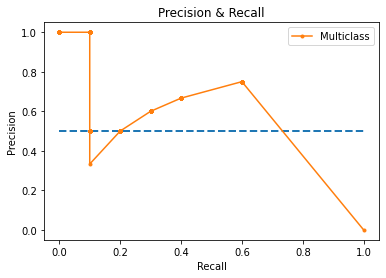

PR AUC (area = 0.55)


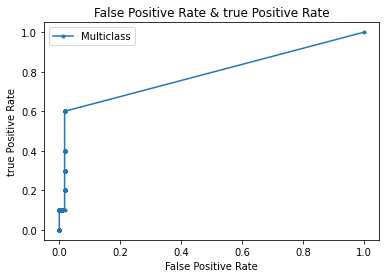

PR ROC (area = 0.79)


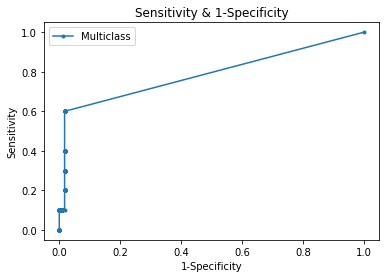

PR AUC (area = 0.79)


In [26]:
plot_roc(roc0)

In [ ]:
# #Precision
#             if fp != 0:
#                 pre = tp/(tp+fp)
#             elif tp == (tp+fp):
#                 pre = 1
#             else :
#                 pre =0
#             #Recall
#             if fn != 0:
#                 re = tp/(tp+fn)
#             elif tp == (tp+fn):
#                 re = 1
#             else :
#                 re =0 
#             #FPR
#             if tn != 0:
#                 fpr = fp/(fp+tn)
#             elif fp == (fp+tn):
#                 fpr = 1
#             else :
#                 fpr =0
#             #Spec
#             if fp != 0:
#                 spec = 1-(tn/(tn+fp))
#             elif tn == (tn+fp):
#                 spec = 1-1
#             else :
#                 spec =1-0  
#             #ACC
#             acc = (tp+tn)/(tp+tn+fp+fn)